Jakarta sport center adalah toko yang menjual berbagai kebutuhan olahraga seperti Jaket, Baju, Tas, dan Sepatu. Toko ini mulai berjualan sejak tahun 2013, sehingga sudah memiliki pelanggan tetap sejak lama, dan tetap berusaha untuk mendapatkan pelanggan baru sampai saat ini.

Di awal tahun 2019, manajer toko tersebut merekrut junior DA untuk membantu memecahkan masalah yang ada di tokonya, yaitu menurunnya pelanggan yang membeli kembali ke tokonya. Junior DA tersebut pun diberi kepercayaan mengolah data transaksi toko tersebut. Manajer toko mendefinisikan bahwa customer termasuk sudah bukan disebut pelanggan lagi (churn) ketika dia sudah tidak bertransaksi ke tokonya lagi sampai dengan 6 bulan terakhir dari update data terakhir yang tersedia.

Manajer toko pun memberikan data transaksi dari tahun 2013 sampai dengan 2019 dalam bentuk csv (comma separated value) dengan data_retail.csv dengan jumlah baris 100.000 baris data.

Berikut tampilan datanya:
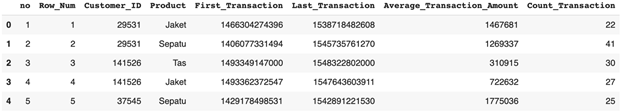

Field yang ada pada data tersebut antara lain:
1. No
2. Row_Num
3. Customer_ID
4. Product
5. First_Transaction
6. Last_Transaction
7. Average_Transaction_Amount
8. Count_Transaction

#### 1. Data preparation test
 - Importing data: Melakukan import data_retail.csv ke python environment.
 - Cleansing data: Melakukan pembersihan dan modifikasi data sehingga siap digunakan untuk analisis lebih lanjut.
 - Data visualization test: Mendapatkan insight dari hasil visualisasi yang telah dibuat.
 - Basic stats method test: Mendapatkan insight dari model dan evaluasi model yang sudah dibuat dan diuji.
 
#### Importing Data dan Inspection
Importlah dataset dan kemudian inspeksilah dataset tersebut dengan

- mencetak lima data teratas saja,
- mencetak info dataset.

In [1]:
import pandas as pd
df = pd.read_csv('data_retail.csv', sep=';')
print('Lima data teratas:')
print(df.head())
print('\nInfo dataset:')
print(df.info())
#Counting Total Missing Value
print('\nCounting total missing value:')
print(df.isnull().sum().sum())

Lima data teratas:
   no  Row_Num  Customer_ID Product  First_Transaction  Last_Transaction  \
0   1        1        29531   Jaket      1466304274396     1538718482608   
1   2        2        29531  Sepatu      1406077331494     1545735761270   
2   3        3       141526     Tas      1493349147000     1548322802000   
3   4        4       141526   Jaket      1493362372547     1547643603911   
4   5        5        37545  Sepatu      1429178498531     1542891221530   

   Average_Transaction_Amount  Count_Transaction  
0                     1467681                 22  
1                     1269337                 41  
2                      310915                 30  
3                      722632                 27  
4                     1775036                 25  

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      ----

#### Data Cleansing

Dua kolom yang menunjukkan terjadinya transaksi tidak bertipe datetime, maka ubahlah kedua kolom tersebut ke tipe data datetime. Kemudian cetaklah kembali 5 data teratas dari dataframe df dan juga tipe data masing-masing kolomnya.

In [2]:
df['First_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')

print(df['Last_Transaction'])
print(df['First_Transaction'])

# print('Lima data teratas:')
# print(df.head())
# print('\nInfo dataset:')
# print(df.info())

0       2018-10-05 05:48:02.608000000
1       2018-12-25 11:02:41.269999872
2       2019-01-24 09:40:02.000000000
3       2019-01-16 13:00:03.911000064
4       2018-11-22 12:53:41.529999872
                     ...             
99995   2016-06-01 11:35:39.092000000
99996   2017-02-09 05:46:10.763000064
99997   2015-08-30 08:54:20.706000128
99998   2014-11-14 02:42:28.026000128
99999   2018-10-24 09:36:04.124999936
Name: Last_Transaction, Length: 100000, dtype: datetime64[ns]
0       2018-10-05 05:48:02.608000000
1       2018-12-25 11:02:41.269999872
2       2019-01-24 09:40:02.000000000
3       2019-01-16 13:00:03.911000064
4       2018-11-22 12:53:41.529999872
                     ...             
99995   2016-06-01 11:35:39.092000000
99996   2017-02-09 05:46:10.763000064
99997   2015-08-30 08:54:20.706000128
99998   2014-11-14 02:42:28.026000128
99999   2018-10-24 09:36:04.124999936
Name: First_Transaction, Length: 100000, dtype: datetime64[ns]


#### Note: Customer churn, juga dikenal sebagai atrisi pelanggan, adalah persentase pelanggan yang berhenti menggunakan produk dan layanan bisnis selama jangka waktu tertentu

Untuk menentukan churn customers dari data dapat dilakukan sebagai berikut:

1. transaksi paling terakhir kapan dilakukan
2. klasifikasikanlah mana customer yang berstatus churn dan mana yang tidak.
Setelah itu cetak lima data teratas dan informasi dataset.


In [3]:
# Transaksi paling terakhir kapan dilakukan
print(max(df['Last_Transaction']))

# Klasifikasikanlah mana customer yang berstatus churn dan mana yang tidak.
df.loc[df['Last_Transaction']<='2018-08-01', 'is_churn'] = True
df.loc[df['Last_Transaction']>'2018-08-01', 'is_churn'] = False
print('Lima data teratas:')
print(df.head())
print('\nInfo dataset:')
print(df.info())

2019-02-01 23:57:57.286000128
Lima data teratas:
   no  Row_Num  Customer_ID Product             First_Transaction  \
0   1        1        29531   Jaket 2018-10-05 05:48:02.608000000   
1   2        2        29531  Sepatu 2018-12-25 11:02:41.269999872   
2   3        3       141526     Tas 2019-01-24 09:40:02.000000000   
3   4        4       141526   Jaket 2019-01-16 13:00:03.911000064   
4   5        5        37545  Sepatu 2018-11-22 12:53:41.529999872   

               Last_Transaction  Average_Transaction_Amount  \
0 2018-10-05 05:48:02.608000000                     1467681   
1 2018-12-25 11:02:41.269999872                     1269337   
2 2019-01-24 09:40:02.000000000                      310915   
3 2019-01-16 13:00:03.911000064                      722632   
4 2018-11-22 12:53:41.529999872                     1775036   

   Count_Transaction is_churn  
0                 22    False  
1                 41    False  
2                 30    False  
3                 27    False

Kemudian, untuk memudahkan dalam pengambilan keputusan kita bisa menggunakan syntax df[‘is_churn’] untuk mengklasifikasikan manakah customer yang termasuk customer churn atau tidak dengan logika ‘TRUE’ and ‘FALSE’

TRUE = konsumen yang melakukan transaksi terakhir kurang dari tanggal 01 Agustus 2018

FALSE = konsumen yang melakukan transaksi terakhir lebih dari tanggal 01 Agustus 2018

In [4]:
df['is_churn']

0        False
1        False
2        False
3        False
4        False
         ...  
99995     True
99996     True
99997     True
99998     True
99999    False
Name: is_churn, Length: 100000, dtype: object

#### Mengubah value kolom is_churn menjadi numerik menggunakan Label Encoder

Untuk lebih memudahkan mana yang tergolong customer churn atau tidak, kita bisa mengubah value kolom is_churn menjadi nilai numerik dengan menggunakan Label Encoder. Hal ini dilakukan agar nantinya ketika masuk ke bagian Data Visualization dapat mengetahui proporsi customer churn setiap kategori produknya.

In [5]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

#COnvert feature/column  'Month'
LE = LabelEncoder()
df['is_churn'] = LE.fit_transform(df['is_churn'])
print(LE.classes_)
print(np.sort(df['is_churn'].unique()))
print('')

[False True]
[0 1]



Sehingga, berdasarkan outputnya terlihat angka 0 diwakili logika False (bukan customer churn) dan angka 1 diwakili logika True yang artinya tergolong customer churn.

Selanjutnya, kita melakukan cara yang sama untuk mengeneralisasikan semua elemen customer. Kira-kira konsumen keberapa dan mana saja yang masuk customer churn atau bukan? Dengan menggunakan syntax df[‘is_churn’] yang diaplikasikan pada semua kolom is_churn.

In [6]:
df['is_churn']

0        0
1        0
2        0
3        0
4        0
        ..
99995    1
99996    1
99997    1
99998    1
99999    0
Name: is_churn, Length: 100000, dtype: int32

#### Menghapus kolom yang tidak diperlukan
Selanjutnya, kita akan menghapus kolom yang tidak diperlukan yaitu kolom ‘no’ dan ‘Row_Num’

Berikut syntax yang bisa digunakan:

In [7]:
del df['no']
del df['Row_Num']
print('Lima data teratas:')
print(df.head())

Lima data teratas:
   Customer_ID Product             First_Transaction  \
0        29531   Jaket 2018-10-05 05:48:02.608000000   
1        29531  Sepatu 2018-12-25 11:02:41.269999872   
2       141526     Tas 2019-01-24 09:40:02.000000000   
3       141526   Jaket 2019-01-16 13:00:03.911000064   
4        37545  Sepatu 2018-11-22 12:53:41.529999872   

               Last_Transaction  Average_Transaction_Amount  \
0 2018-10-05 05:48:02.608000000                     1467681   
1 2018-12-25 11:02:41.269999872                     1269337   
2 2019-01-24 09:40:02.000000000                      310915   
3 2019-01-16 13:00:03.911000064                      722632   
4 2018-11-22 12:53:41.529999872                     1775036   

   Count_Transaction  is_churn  
0                 22         0  
1                 41         0  
2                 30         0  
3                 27         0  
4                 25         0  


### Data Visualization

#### Customer acquisition by year

Setelah semuanya lancar, langkah berikutnya adalah membuat visualisasi data berupa trend of customer acquisition by year dengan menggunakan bar chart. Untuk itu kita buat feature/kolom tambahan yang merupakan tahun dari First_Transaction dan tahun dari Last_Transaction masing-masingnya dengan nama Year_First_Transaction dan Year_Last_Transaction sebelum melakukan visualisasi.

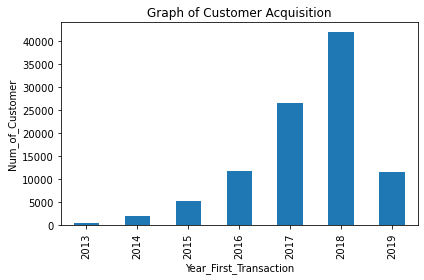

In [8]:
import matplotlib.pyplot as plt
# Kolom tahun transaksi pertama
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
# Kolom tahun transaksi terakhir
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year
df_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()
df_year.plot(x='Year_First_Transaction', y='Customer_ID', kind= 'bar', title='Graph of Customer Acquisition')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

#### Seperti namanya, customer acquisition adalah proses penarikan pelanggan ke layanan yang kamu tawarkan. Proses ini sangat berguna, terutama untuk perkembangan bisnismu dalam jangka panjang.

Berdasarkan visualisasi bar chart, dapat disimpulkan bahwa number of customer tertinggi diraih pada tahun 2018 sebesar 40000. Sedangkan yang memiliki number of customer terendah terjadi pada tahun 2013.

#### Transaction by year
Visualisasikanlah trend jumlah transaksi per tahunnya dengan menggunakan bar chart.

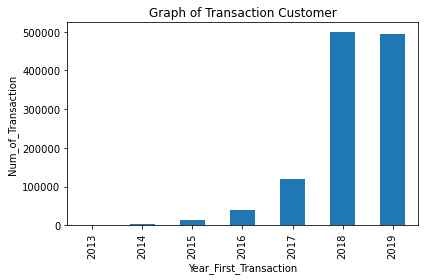

In [9]:
import matplotlib.pyplot as plt
plt.clf()
df_year = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_year.plot(x='Year_First_Transaction', y='Count_Transaction_Amount', kind='bar', title='Graph of Transaction Customer')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.tight_layout()
plt.show()

Berdasarkan visualisasi bar chart, number of customer sejalan dengan number of transaction. Hal ini terlihat pada tahun 2018 yakni sama sama meningkat baik transaksi maupun konsumennya. Hal serupa juga dialami dan terjadi pada tahun 2019

#### Average transaction amount by year

Dengan menggunakan seaborn pointplot, visualisasikanlah tren dari tahun ke tahun rata-rata jumlah transaksi untuk tiap-tiap produknya.

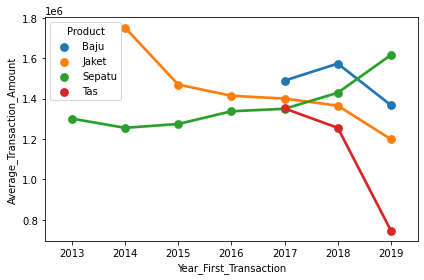

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.clf()
sns.pointplot(data = df.groupby(['Product', 'Year_First_Transaction']).mean().reset_index(), 
              x='Year_First_Transaction', 
              y='Average_Transaction_Amount', 
              hue='Product')
plt.tight_layout()
plt.show()

Berdasarkan rata-rata transaksi, beberapa produk mengalami kecenderungan naik-turun. Namun juga konstan seperti produk sepatu

#### Proporsi churned customer untuk setiap produk

Dari sisi churned customer, khususnya untuk melihat seberapa besar proporsi churned customer untuk tiap-tiap produk dapat diketahui insight-nya melalui pie chart. Visualisasikan pie chartnya untuk keempat produk yang dimaksudkan.

<Figure size 432x288 with 0 Axes>

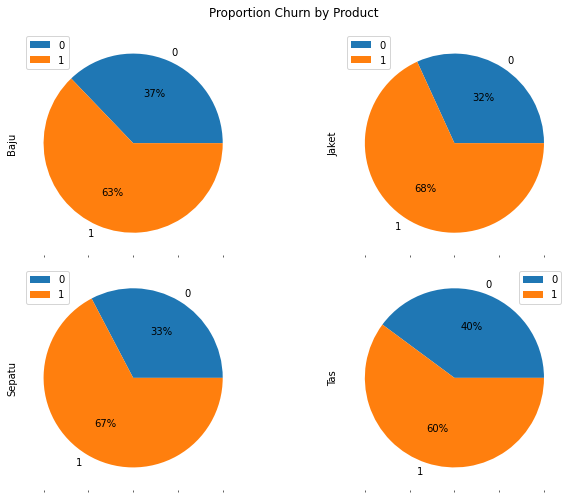

In [11]:
import matplotlib.pyplot as plt
plt.clf()
# Melakukan pivot data dengan pivot_table
df_piv = df.pivot_table(index='is_churn', 
                        columns='Product',
                        values='Customer_ID', 
                        aggfunc='count', 
                        fill_value=0)
# Mendapatkan Proportion Churn by Product
plot_product = df_piv.count().sort_values(ascending=False).head(5).index
# Plot pie chartnya
df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True,
                figsize=(10, 7),
                layout=(-1, 2),
                autopct='%1.0f%%',
                title='Proportion Churn by Product')
plt.tight_layout()
plt.show()

Berdasarkan visualisasi pie chart, seperti yang telah kita jelaskan sebelumnya bahwa ngka 0 diwakili logika False (bukan customer churn) dan angka 1 diwakili logika True yang artinya tergolong customer churn. Terlihat bahwa hampir keseluruhan produk memiliki customer churn. Artinya adalah konsumen sudah mulai berhenti untuk menggunakan layanan atau menghentikan pembeliannya (sudah bukan pelanggan). Rentang customer churn keseluruhan produk berkisar 60–68%. Kira-kira apa penyebabnya ya? Hal ini diakibatkan konsumen sudah agak sedikit beralih ke produk lain.

Alasan utama mengapa customer churn rate penting adalah persentase pelanggan yang hilang tersebut sangat memengaruhi growth rate perusahaan. Sebagai contoh, kamu memiliki ember berisi batu. Tiba-tiba, ada lubang yang menyebabkan banyak batu berjatuhan. Mengisi ember tersebut agar kembali penuh dengan batu yang berserakan akan memakan waktu, biaya, dan tenaga tambahan begitu pula dgn churn, Maka dari itu, sebelum mengisi batu ke dalam ember, kamu perlu mengetahui di mana letak lubangnya, kenapa bisa ada lubang di situ, dan seterusnya.

Solusi yang bisa dilakukan: kita bisa memanfaatkan 32–40% yang tergolong kedalam bukan customer churn untuk fokus kepada pelanggan setia produk Jakarta Sport Center dengan memfokuskan tenaga, biaya, dan juga waktu pada pelanggan yang sudah terbukti setia.

#### Distribusi kategorisasi count transaction
Selanjutnya akan melakukan visualisasi dari distribusi kategorisasi count transaction. Kategorisasi ini dilakukan dengan mengelompokkan jumlah transaksi seperti yang diperlihatkan oleh tabel berikut:

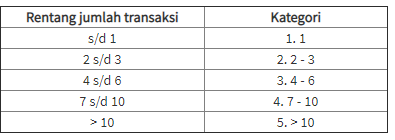

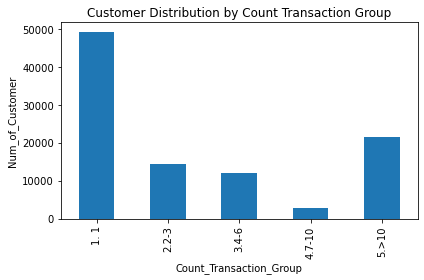

In [12]:
import matplotlib.pyplot as plt
plt.clf()
# Kategorisasi jumlah transaksi
def func(row):
    if row['Count_Transaction'] == 1:
        val = '1. 1'
    elif (row['Count_Transaction'] > 1 and row['Count_Transaction'] <= 3):
        val ='2.2-3'
    elif (row['Count_Transaction'] > 3 and row['Count_Transaction'] <= 6):
        val ='3.4-6'
    elif (row['Count_Transaction'] > 6 and row['Count_Transaction'] <= 10):
        val ='4.7-10'
    else:
        val ='5.>10'
    return val
# Tambahkan kolom baru
df['Count_Transaction_Group'] = df.apply(func, axis=1)
df_year = df.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
df_year. plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Count Transaction Group')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

Setelah diketahui melalui visualisasi bar chart dalam distribusi kategori transaksi yang dilakukan, ternyata jumlah transaksi mereka hanya terjadi sekali (paling dominan). Sedangkan yang terendah adalah konsumen yang melakukan transaksi 7–10 kali dalam pembeliannya

#### Distribusi kategorisasi average transaction amount

Selanjutnya, akan melakukan visualisasi dari distribusi kategorisasi average transaction amount. Kategorisasi ini dilakukan dengan mengelompokkan rata-rata besar transaksi seperti yang diperlihatkan oleh tabel berikut:

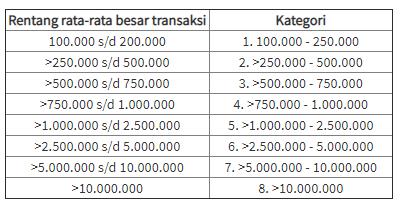

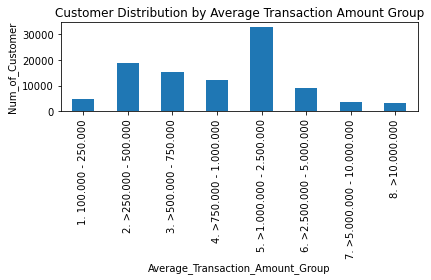

In [13]:
import matplotlib.pyplot as plt
plt.clf()
# Kategorisasi rata-rata besar transaksi
def f(row):
     if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <=200000):
          val ='1. 100.000 - 250.000'
     elif (row['Average_Transaction_Amount'] >250000 and row['Average_Transaction_Amount'] <= 500000):
          val ='2. >250.000 - 500.000'
     elif (row['Average_Transaction_Amount'] >500000 and row['Average_Transaction_Amount'] <= 750000):
          val ='3. >500.000 - 750.000'
     elif (row['Average_Transaction_Amount'] >750000 and row['Average_Transaction_Amount'] <= 1000000):
          val ='4. >750.000 - 1.000.000'
     elif (row['Average_Transaction_Amount'] >1000000 and row['Average_Transaction_Amount'] <= 2500000):
          val ='5. >1.000.000 - 2.500.000'
     elif (row['Average_Transaction_Amount'] >2500000 and row['Average_Transaction_Amount'] <= 5000000):
          val ='6. >2.500.000 - 5.000.000'
     elif (row['Average_Transaction_Amount'] >5000000 and row['Average_Transaction_Amount'] <= 10000000):
          val ='7. >5.000.000 - 10.000.000'
     else:
          val ='8. >10.000.000'
     return val
# Tambahkan kolom baru
df['Average_Transaction_Amount_Group'] = df.apply(f, axis=1)
df_year = df.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
df_year.plot(x='Average_Transaction_Amount_Group', y='Customer_ID',kind='bar', title='Customer Distribution by Average Transaction Amount Group')
plt.xlabel('Average_Transaction_Amount_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

Berdasarkan output visualisasi bar chart, rata-rata besar transaksi terjadi pada rentang angka > 1.000.000 hingga 2.500.000.

### Modelling

#### Feature Columns dan Target
Di bagian ini, selanjutnya akan menentukan feature columns dari dataset yang dimiliki, di sini dipilih kolom Average_Transaction_Amount, Count_Transaction, dan Year_Diff. Akan tetapi, kolom terakhir belum ada. Silakan dicreate dahulu kolom Year_Diff ini dan kemudian assign dataset dengan feature columns ini sebagai variabel independent X.

Untuk target tentunya persoalan costumer dengan kondisi churn atau tidak, assign dataset untuk target ini ke dalam variabe dependent y.

In [14]:
# Feature column: Year_Diff
df['Year_Diff'] = df['Year_Last_Transaction'] - df['Year_First_Transaction']
# Nama-nama feature columns
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']
# Features variable
X = df[feature_columns]
# Target variable
y = df['is_churn'] 
y=y.astype('int')

print('Kolom Feature : ', X)
print('\nKolom Target : ', y)

Kolom Feature :         Average_Transaction_Amount  Count_Transaction  Year_Diff
0                         1467681                 22          0
1                         1269337                 41          0
2                          310915                 30          0
3                          722632                 27          0
4                         1775036                 25          0
...                           ...                ...        ...
99995                      298662                  1          0
99996                      349556                  1          0
99997                      598013                  1          0
99998                     1208591                  1          0
99999                      486710                  1          0

[100000 rows x 3 columns]

Kolom Target :  0        0
1        0
2        0
3        0
4        0
        ..
99995    1
99996    1
99997    1
99998    1
99999    0
Name: is_churn, Length: 100000, dtype: int32


Setelah variabel independent X dan variabel dependent y selesai dilakukan, maka pecahlah X dan y ke dalam bagian training dan testing. Bagian testing 25% dari jumlah entri data.

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Langkah selanjutnya akan membuat model menggunakan Linear Regression, inisialisasilah model, fit, dan kemudian evaluasi model dengan menggunakan confusion matrix.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
# Inisiasi model logreg
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train, y_train)
# Predict model
y_pred = logreg.predict(X_test)
# Evaluasi model menggunakan confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[    1  8330]
 [    3 16666]]


Confusion matrix yang telah dihitung sebelumnya dapat divisualisasikan dengan menggunakan heatmap dari seaborn. Untuk itu tampilkanlah visualisasi dari confusion matrix ini.

<Figure size 432x288 with 0 Axes>

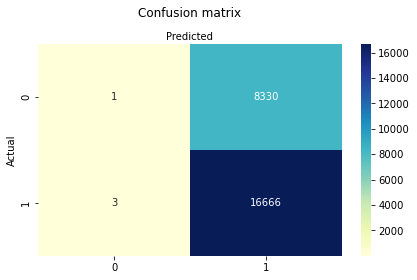

In [17]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.clf()
# name  of classes
class_names = [0, 1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

Kemudian, hitunglah nilai accuracy, precission dan recall berdasarkan nilai target sesungguhnya dan nilai target hasil prediksi.

In [18]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall   :', recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.66668
Precision: 0.66668
Recall   : 0.66668


Note:
Dalam “dunia” pengenalan pola (pattern recognition) dan temu kembali informasi (information retrieval), precision dan recall adalah dua perhitungan yang banyak digunakan untuk mengukur kinerja dari sistem / metode yang digunakan. Precision adalah tingkat ketepatan antara informasi yang diminta oleh pengguna dengan jawaban yang diberikan oleh sistem. Sedangkan recall adalah tingkat keberhasilan sistem dalam menemukan kembali sebuah informasi.

Sedangkan di “dunia lain” seperti dunia statistika dikenal juga istilah accuray. Accuracy didefinisikan sebagai tingkat kedekatan antara nilai prediksi dengan nilai aktual. Ilustrasi berikut ini memberikan gambaran perbedaan antara accuracy dan precision.

Dengan demikian, nilai precision, recall, dan accuracy memiliki nilai yang sama sebesar 0,66668.